In [2]:
import pandas as pd
import missingno as msno

Script Author: Trokon Johnson

## Script Purpose

The purpose of this file is to merge together the city population files in this notebook. I'm choosing to describe this as the files that follow the structure shown in the image below:

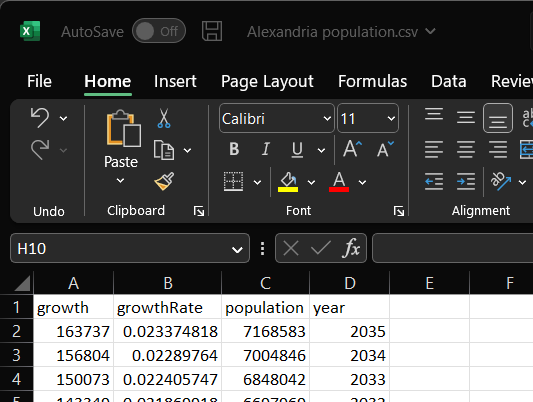

## Data File Information

As seen in the screenshot of Task 1's [Data Collection Tracker](https://docs.google.com/spreadsheets/d/1grEw7tJSQ9Oiwq23ArYntXCHJL9H7pPytLvzI7HID7o/edit?usp=sharing), these files seem to be from the [World Population Review](https://worldpopulationreview.com/world-cities).

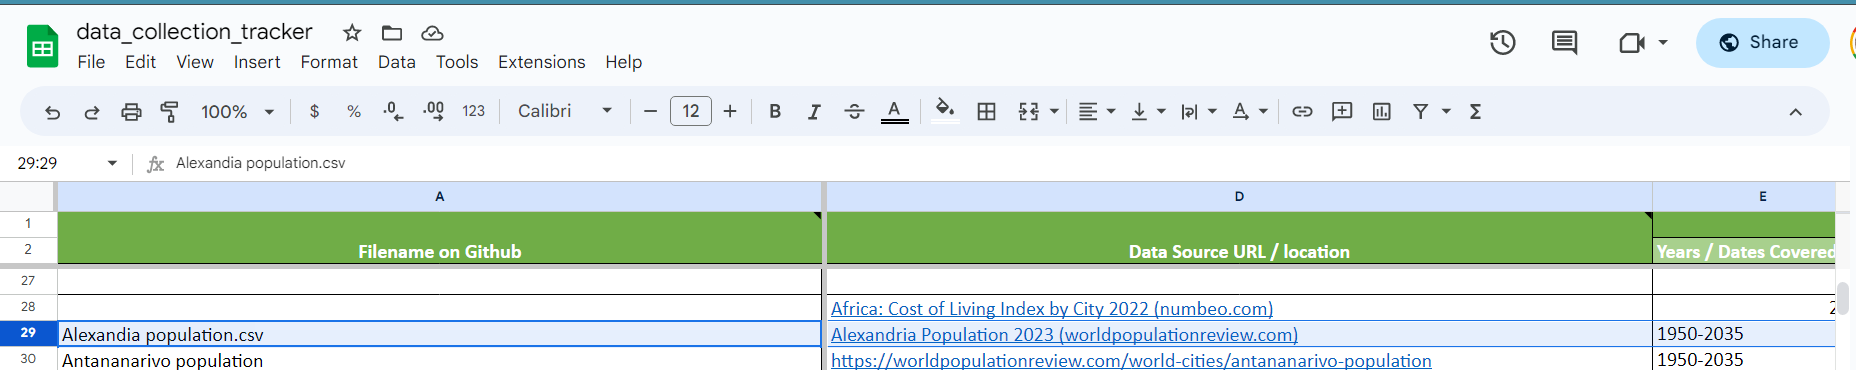

## Fields

These are the fields included in each file

* population
* year
* growth: Seems to be change in population from previous year to current year
* growthRate: Seems to be current year growth over last year population

### Growth Confirmation

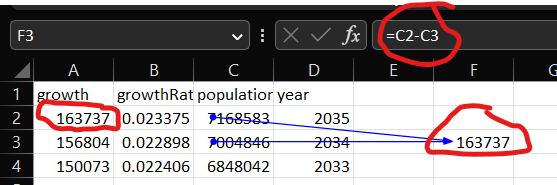

### Growth Rate Confirmation

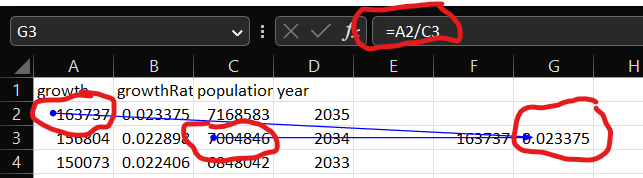

## Loading files
Nothing crazy here just following these steps:
1. Load in each file - Note that we're using relative paths, so this should work on any system that pulls/downloads the whole repo
2. Make sure to treat the 'year' file as a date data type
3. Add a 'city' field with the name of the city

This was all done manually, but, if the file names followed a standard, we could have the script just search the data folder for files that met the condition, and we wouldn't have to manually add new files.

Also, we should touch base with Task-1 to ask why these cities specifically.


In [3]:
alexandriaPop = pd.read_csv('../../src/data/city_growth_models/Alexandria population.csv', parse_dates=['year'])
alexandriaPop['city'] = 'Alexandria'

antananarivoPop = pd.read_csv('../../src/data/city_growth_models/Antananarivo population.csv', parse_dates=['year'])
antananarivoPop['city'] = 'AntananarivoPop'

kanoPop = pd.read_csv('../../src/data/city_growth_models/kano_population_1950_to_2035.csv', parse_dates=['year'])
kanoPop['city'] = 'Kano'

cairoPop = pd.read_csv('../../src/data/city_growth_models/population-cairo_1950_to_2035.csv', parse_dates=['year'])
cairoPop['city'] = 'Cairo'

dar_es_salaamPop = pd.read_csv('../../src/data/city_growth_models/population-dar es salaam_1950_to_2035.csv', parse_dates=['year'])
dar_es_salaamPop['city'] = 'Dar Es Salaam'

ekurhuleniPop = pd.read_csv('../../src/data/city_growth_models/population-ekurhuleni_1950_to_2035.csv', parse_dates=['year'])
ekurhuleniPop['city'] = 'Ekurhuleni'


## Concatenating files

As stated in the intro, since all these files follow the same structure, we're gonna concatenate them all together to make one dataframe.

In [4]:
cityPopulationDF = pd.concat( [alexandriaPop, 
            antananarivoPop, 
            cairoPop,
            dar_es_salaamPop,
            ekurhuleniPop,
            kanoPop] )

# Basic verification & Exploration

We're just gonna do some basic checks to make sure that there's nothing that's super out of pocket at first blush in these files.

## Looking for Missing Numbers

A simple check to see how many missing numbers there are in the dataframe. From the graph below, there's no missing numbers/nan.

<AxesSubplot: >

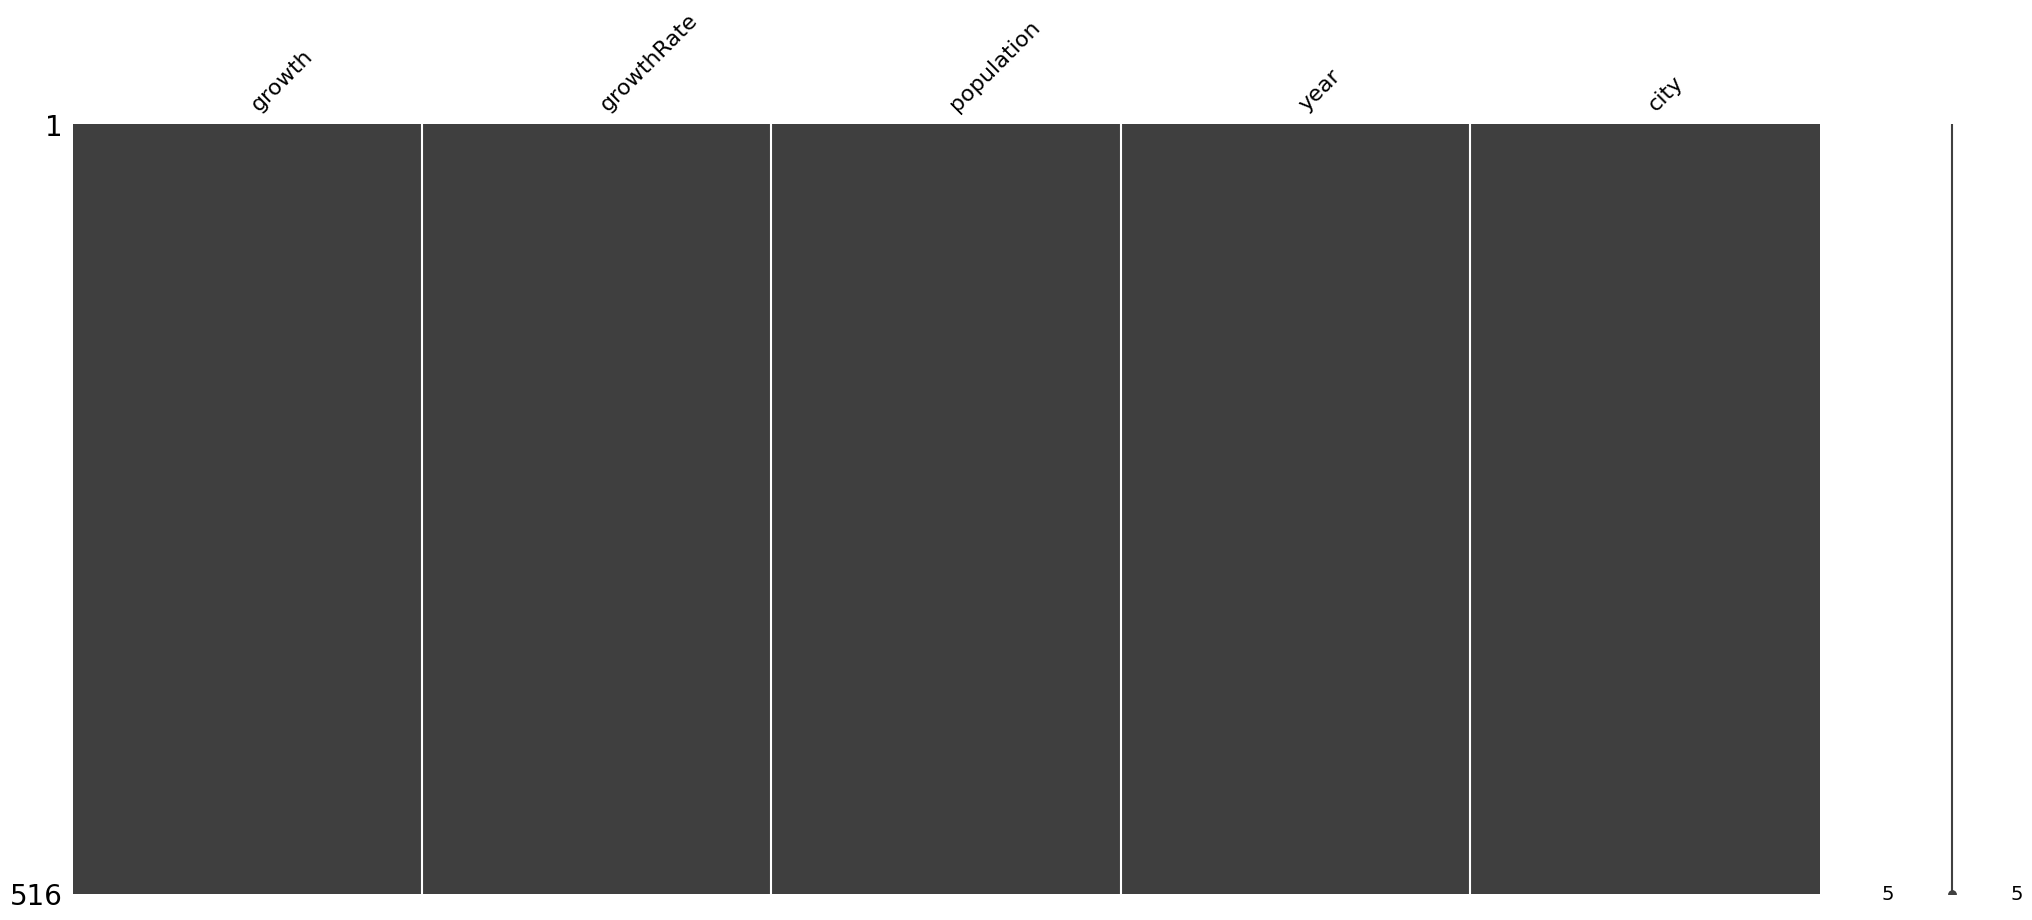

In [5]:
msno.matrix(cityPopulationDF)

## Boxplots

Just some simple boxplots to check if there's any major outliers in the data.

<AxesSubplot: >

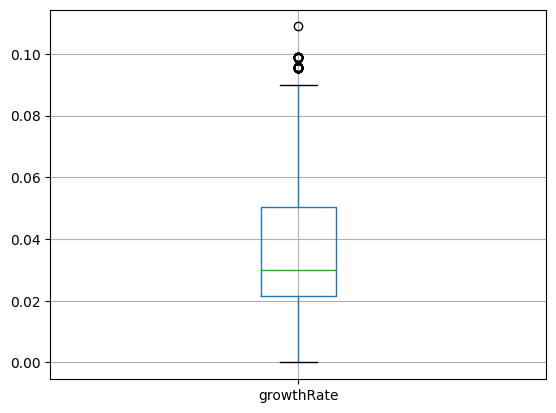

In [6]:
cityPopulationDF[['growthRate']].boxplot()

<AxesSubplot: title={'center': 'growth'}, xlabel='city'>

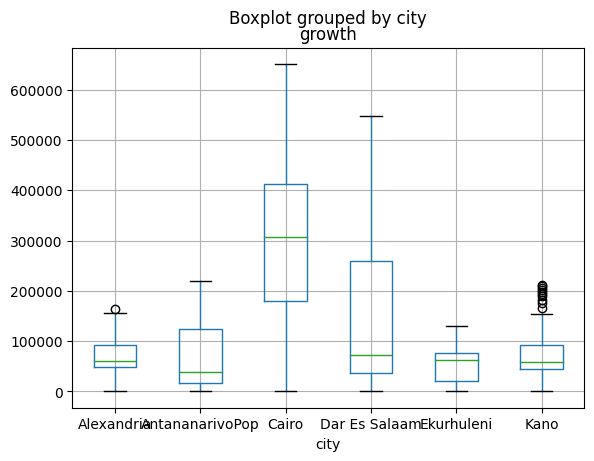

In [7]:
cityPopulationDF.boxplot(column='growth', by='city')

<AxesSubplot: title={'center': 'population'}, xlabel='city'>

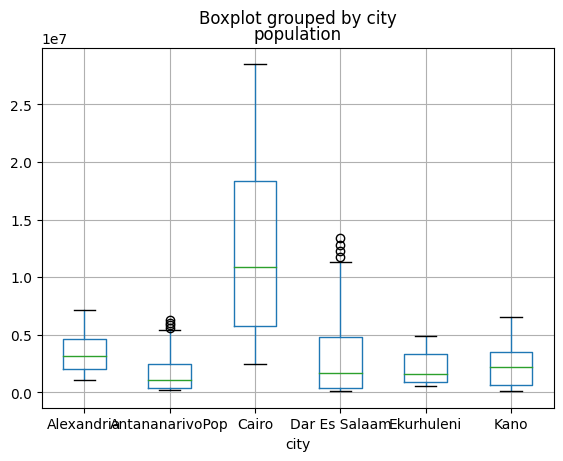

In [8]:
cityPopulationDF.boxplot(column='population', by='city')

# Writing "Processed" Datafile

In [9]:
cityPopulationDF.to_csv('../processedData/multiple_city_population_from_world_population_review.csv')